### 🎯 Problem Statement

The goal of this project is to understand which factors influence student exam performance and to build a simple model that predicts exam scores.

### 📌 Objectives

* explore trends in student behavior
  
* identify which factors correlate with exam results  

* visualize relationships between study habits and outcomes  

* build a basic predictive model (regression and pass/fail classification)

This notebook is primarily an **EDA project** with a light predictive modeling component.


**Exploratory Data Analysis (EDA) on the Students Performance Dataset.**

In this notebook, I:

* performed data cleaning
* handled missing values
* created age groups
* visualized feature distributions
* analyzed survival by gender, class, age group, and embarkation port
* generated key insights from the data

# **Step 1: Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

*  It tells Matplotlib to use the default plot style.
*  Matplotlib has many built-in visual styles (like themes), for example:

1. "seaborn"
2. "ggplot"
3. "dark_background"
4. "bmh"
5. "default" ← the normal Matplotlib look

**You can try other themes**
* plt.style.use("seaborn-v0_8")
* plt.style.use("ggplot")
* plt.style.use("dark_background")

# **Step 2: Load dataset**

**Students Performance Analysis**

In [ ]:
df = pd.read_csv("/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# **Step 3: Understanding the dataset**

**Shape (rows & Columns)**

Understanding the number of rows and columns helps estimate data volume and plan EDA accordingly.

In [ ]:
df.shape

(6607, 20)

**Column names**

Listing column names helps us quickly understand the structure of the dataset and identify important variables.

In [ ]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

**Datatypes - Missing Values - Non null counts**

df.info() is used to check data types and missing values. It helps decide data cleaning techniques such as type conversion and imputation.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

**Quick statistics for numeric columns**

Descriptive statistics give an overall summary of numerical features and help us identify skewness and outliers.

In [ ]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


# **Step 4: Missing values & Duplicates**

**Check missing values in each column**

Checking missing values is necessary to avoid errors in analysis and modeling. Columns with high missing values may need imputation or removal.

In [ ]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

**Check duplicates**

Duplicate rows may distort insights, so we check and handle duplicates to maintain data quality.

In [ ]:
df.duplicated().sum()

0

# **Step 5: Handling Missing Values**

❓ Why this step is important

* We handle missing values because:

* missing data can distort averages and graphs

* many ML models do not accept NaN values

* some columns may lose meaning if too many values are missing

* decisions (drop vs fill) change analysis results

* So we must treat missing values carefully instead of ignoring them.

**In this step we check:**

* which columns have missing values

* how many values are missing

* whether the column is:

* categorical → fill with mode

* numerical → fill with median/mean

* whether we should drop a column if missing values are too many

* **You already observed:**

* Teacher_Quality → 78 missing

* Parental_Education_Level → 90 missing

* Distance_from_Home → 67 missing

**So we will fill them — not drop rows.**

**Fill categorical columns with MODE**

In [ ]:
df['Teacher_Quality'] = df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0])
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0])
df['Distance_from_Home'] = df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0])

In [ ]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

The dataset contained missing values in Teacher_Quality, Parental_Education_Level, and Distance_from_Home. Since all three are categorical features, missing values were imputed using the mode (most frequent category).

# **Step 6: Univariate Analysis**

**Univariate analysis means:**

* 👉 studying one column at a time

**We do this to:**

* understand the distribution of each feature

* check most common categories

* detect skewness & outliers

* see overall pattern of scores

* This gives us the first picture of the dataset before comparing variables.

## **Step 6A: Univariate Analysis of Numerical Features**

**(To silence the warnings of deprecated)**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

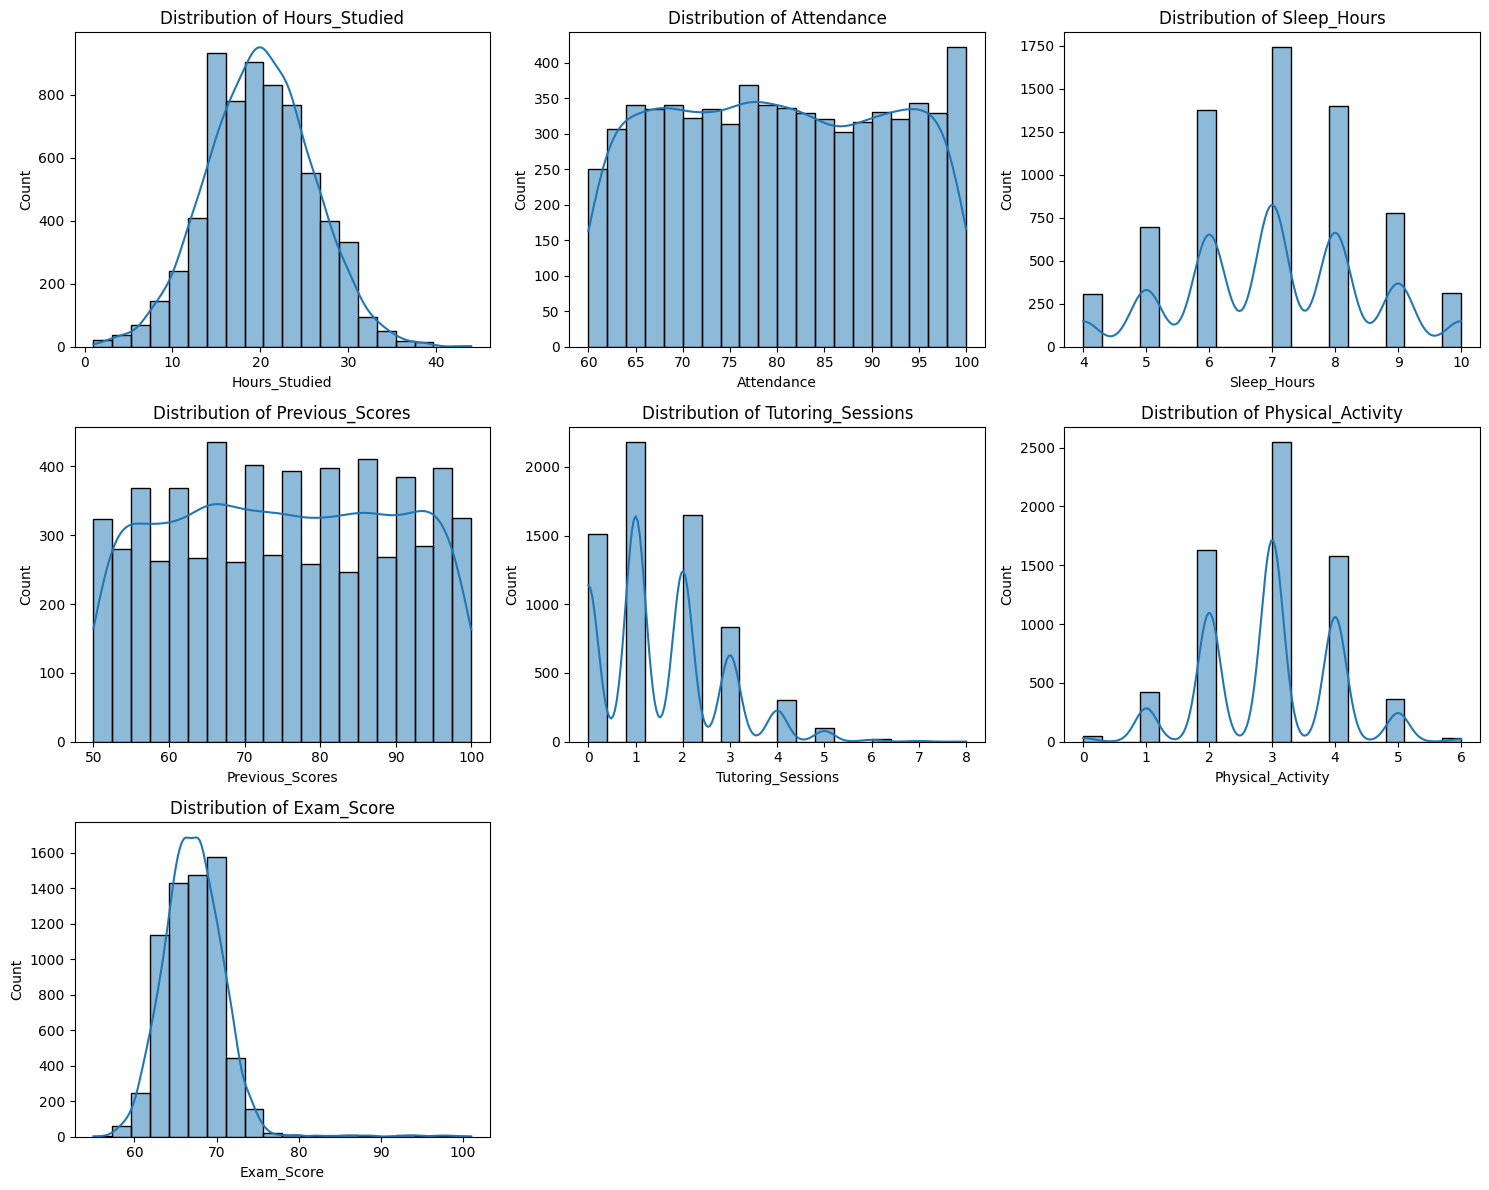

In [ ]:
numeric_cols = ['Hours_Studied','Attendance','Sleep_Hours',
                'Previous_Scores','Tutoring_Sessions',
                'Physical_Activity','Exam_Score']

plt.figure(figsize=(15,12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3,3,i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

**👉 What to observe**

* Are hours studied skewed?

* Is attendance clustered high/low?

* Is exam score normally distributed?

* Are tutoring sessions mostly low?

* Any extreme outliers?

**Interpretations**
* Hours_Studied appears approximately normal, centered around 18–24 hours/week

* Attendance is generally high, mostly between 70–95%

* Sleep_Hours clusters around 6–8 hours, which is a healthy range for students

* Previous_Scores are spread fairly evenly between 55–95, showing varied academic history

* Tutoring_Sessions is right-skewed, meaning most students attend 0–2 sessions

* Physical_Activity is concentrated around 3–4 units, indicating moderate activity levels

* Exam_Score follows an almost normal curve centered around 65–75, with fewer extremes

# **Step 6B: Univariant Analysis of Categorical Features**

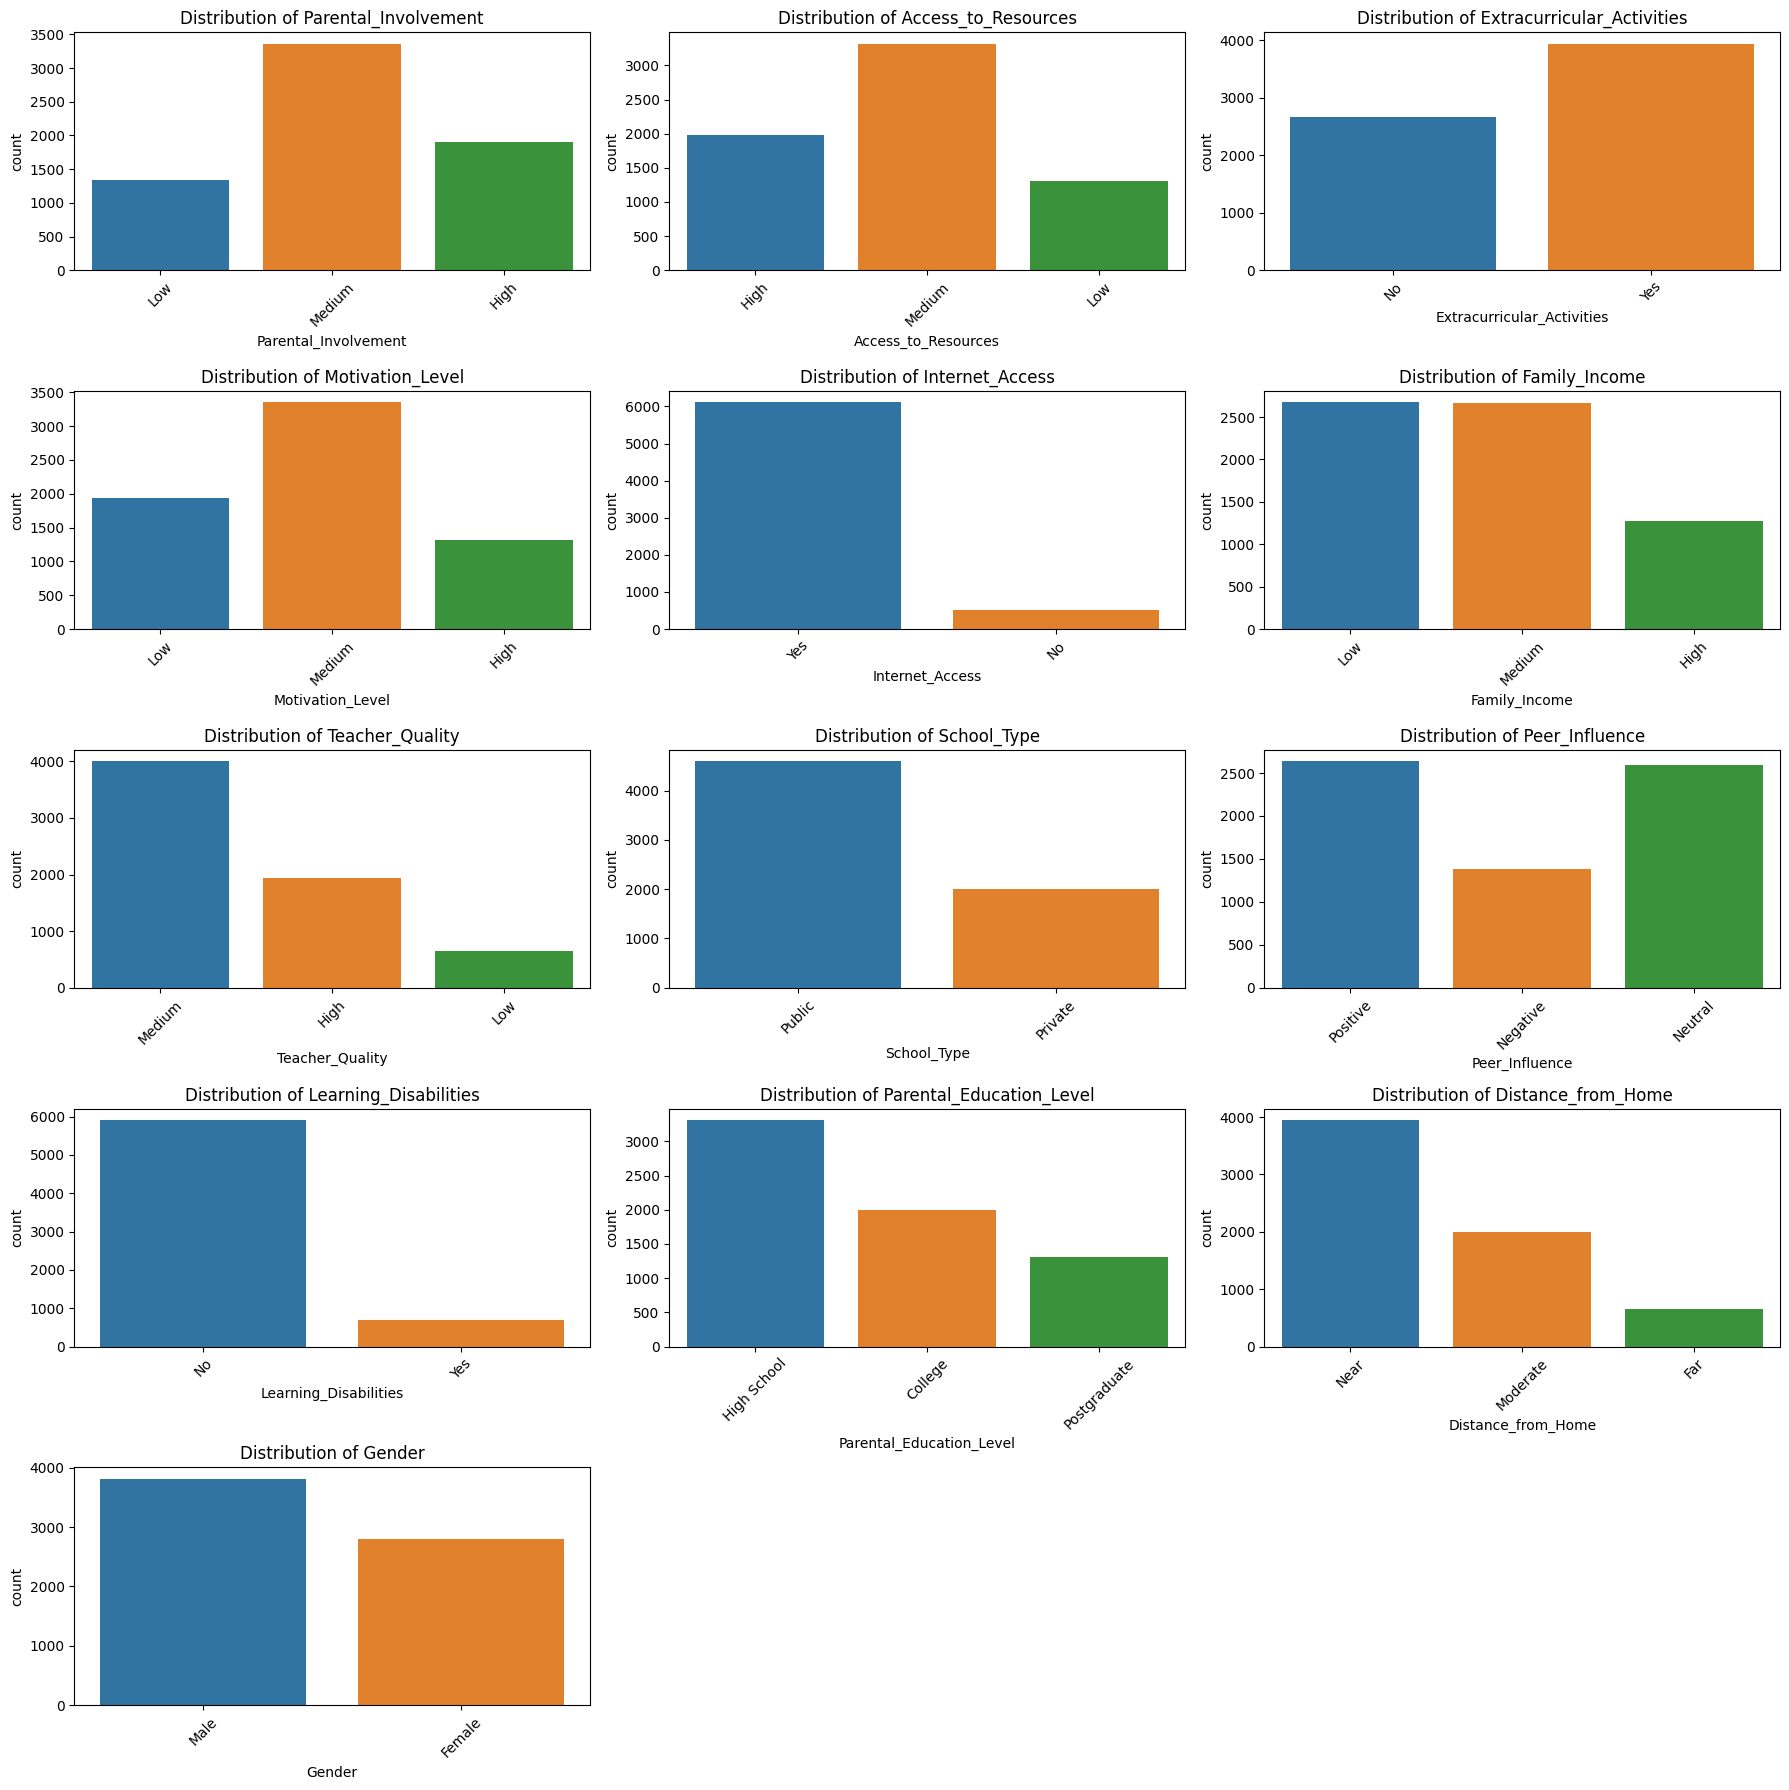

In [ ]:
cat_cols = ['Parental_Involvement','Access_to_Resources','Extracurricular_Activities',
            'Motivation_Level','Internet_Access','Family_Income','Teacher_Quality',
            'School_Type','Peer_Influence','Learning_Disabilities',
            'Parental_Education_Level','Distance_from_Home','Gender']

plt.figure(figsize=(18,18))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(5,3,i)
    sns.countplot(x=df[col])
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

**Interpretations**
* Parental_Involvement is mostly Medium, with fewer High and the least Low involvement

* Access_to_Resources is highest at Medium, followed by High, with Low being least common

* Extracurricular_Activities shows more Yes than No, meaning many students participate

* Motivation_Level is mainly Medium, with fewer High-motivation students

* Internet_Access is overwhelmingly Yes, indicating almost universal access

* Family_Income is mostly Low to Medium, with fewer High-income families

* Teacher_Quality is primarily Medium, followed by High, and very few Low ratings

* School_Type is dominated by Public schools, with fewer Private school students

* Peer_Influence is mostly Positive or Neutral, with fewer Negative influences

* Learning_Disabilities are mostly No, meaning very few students report disabilities

* Parental_Education_Level is highest at High School, followed by College, then Postgraduate

* Distance_from_Home is mainly Near, followed by Moderate, with few Far distances

* Gender distribution shows slightly more Males than Females

**✅ What this tells us overall**

* Students generally have moderate study habits and attendance

* Access to internet and resources is high

* Motivation is mostly medium — opportunity to boost

* Majority come from low/medium-income homes

* Exam scores are normally distributed

* Strong practical factors affecting performance likely include:

* hours studied

* attendance

* sleep

* motivation

* resources

* parental education

# **Step 7: Handle Outliers**

**Outliers can:**

* distort the mean and standard deviation

* negatively impact correlations

* mislead ML models

* indicate data-entry errors or rare events

* So we detect them first — then decide whether to keep, cap, or remove.

**👀 What are we checking?**

**We will examine outliers for numeric columns only:**

* Hours_Studied

* Attendance

* Sleep_Hours

* Previous_Scores

* Tutoring_Sessions

* Physical_Activity

* Exam_Score

## Step 7A: Detect outliers using boxplots (visual)

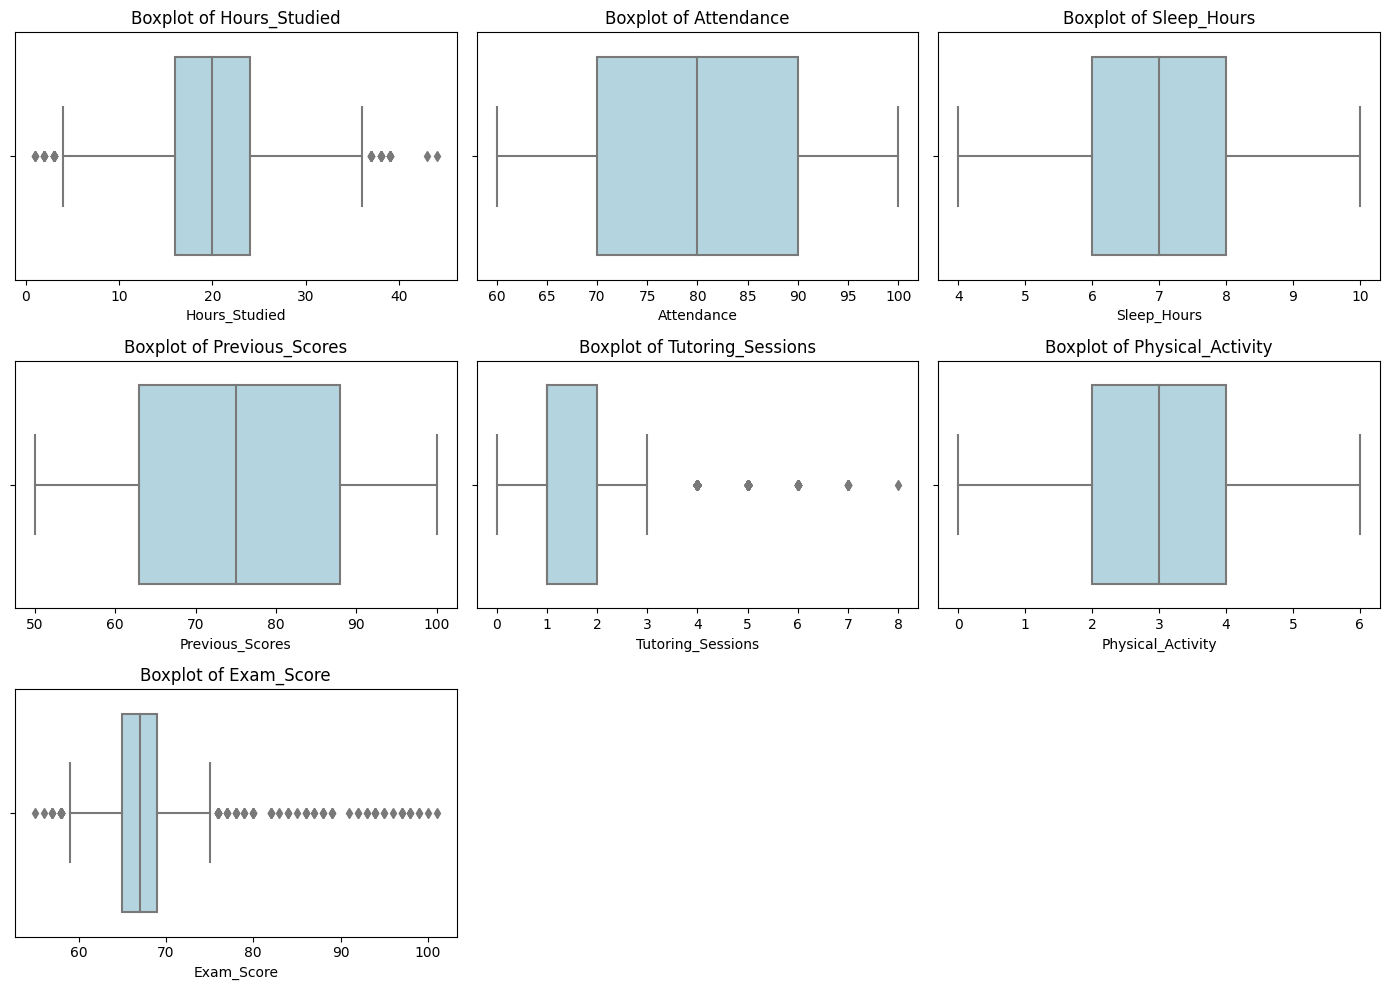

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = [
    'Hours_Studied','Attendance','Sleep_Hours',
    'Previous_Scores','Tutoring_Sessions',
    'Physical_Activity','Exam_Score'
]

plt.figure(figsize=(14,10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3,3,i)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

## **Step 7B: Detect outliers statistically (IQR rule)**

In [ ]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) |
            (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()

outliers

Hours_Studied         43
Attendance             0
Sleep_Hours            0
Previous_Scores        0
Tutoring_Sessions    430
Physical_Activity      0
Exam_Score           104
dtype: int64

**📌 Key observations**

**✅ Attendance, Sleep_Hours,Previous_Scores, Physical_Activity**
* No detected outliers, Distributions are clean and consistent

**⚠️ Hours_Studied → 43 outliers**

* A few students study very high or very low hours

* These are likely real behaviors, not errors

**🚨 Tutoring_Sessions → 430 outliers (very high)**

* Strong right skew (most students = 0–2 sessions)

* Large values like 6–8 sessions flagged as outliers

* These are not errors — just less common students who take lots of tutoring

* Best choice = cap not delete

**⚠️ Exam_Score → 104 outliers**

* High or low scoring extreme students

* Important to retain because they carry meaning (top/bottom performers)

**👉 we will cap outliers instead of deleting them**

## **Step 7C: Cap outliers (Winsorization)**

In [ ]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower, upper)

**We applied Winsorization to cap extreme values at the 1st and 99th percentiles so that unusually high or low values remained in the dataset but did not disproportionately influence the analysis.**

* Hours_Studied — few extreme studiers → capped

* Tutoring_Sessions — highly skewed → capped strongly

* Exam_Score — extreme top/bottom scorers → lightly capped

* Other variables — no action required

**🛠️ What is Winsorization (Capping Outliers)?**

* Winsorization means replacing extreme outlier values with the nearest acceptable value instead of deleting the rows.

**Example:**

* if very high values are above the 99th percentile → replace them with 99th percentile value

* if very low values are below the 1st percentile → replace them with 1st percentile value

* So we keep the data but reduce the effect of extreme values on analysis.

**🤔 Why do we cap outliers instead of removing them?**

**Because in student datasets:**

* high scores are real students, not errors

* very low scores are also real students

* some students attend many tutoring sessions

* some study very few or very many hours

**Deleting them would:**

* lose information about weak and top performers

* reduce dataset size

* bias results

**Winsorization keeps them but makes them less extreme so:**

* mean and regression models are not distorted

* visualizations look cleaner

* variance becomes more realistic

**📌 When Winsorization is useful**

**Use it when:**

✔️ outliers are real observations

✔️ we don’t want to delete rows

✔️ data is right-skewed (like tutoring sessions)

**Avoid it when:**

✖️ outliers come from data entry mistakes

✖️ invalid values (like −50 hours studied)

# **Step 8: Encode Categorical Variables**

**✅ Why do we need encoding?**

* Machine learning models and correlation matrices cannot directly understand text values like:

* "Male", "Female"

* "High", "Medium", "Low"

* "Yes", "No"

* "Public", "Private"

* So we must convert them into numeric form.

## **Step 8A: Label Encoding (for ordered categories)**

**Use when categories have meaningful order:**

* Low < Medium < High

* Near < Moderate < Far

* High School < College < Postgraduate

**📌 Why?**

* Because the order matters — model should learn that:

* High > Medium > Low

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordered_columns = {
    'Parental_Involvement': ['Low', 'Medium', 'High'],
    'Access_to_Resources': ['Low', 'Medium', 'High'],
    'Motivation_Level': ['Low', 'Medium', 'High'],
    'Family_Income': ['Low', 'Medium', 'High'],
    'Teacher_Quality': ['Low', 'Medium', 'High'],
    'Peer_Influence': ['Negative', 'Neutral', 'Positive'],
    'Parental_Education_Level': ['High School', 'College', 'Postgraduate'],
    'Distance_from_Home': ['Near', 'Moderate', 'Far']
}

encoder = OrdinalEncoder(categories=list(ordered_columns.values()))

df[list(ordered_columns.keys())] = encoder.fit_transform(
    df[list(ordered_columns.keys())]
)

## **Step 8B: One-Hot Encoding (for nominal/unordered categories)**

**Use when categories do NOT have order:**

* Gender

* Internet_Access

* Extracurricular_Activities

* Learning_Disabilities

* School_Type

**📌 Why?**

* Because Male is not “greater than” Female — just different.

In [ ]:
nominal_cols = [
    'Gender',
    'Internet_Access',
    'Extracurricular_Activities',
    'Learning_Disabilities',
    'School_Type'
]

df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

**drop_first=True prevents dummy variable trap.**

**Categorical variables were encoded using a combination of ordinal encoding for ordered categories and one-hot encoding for nominal categories so that machine learning algorithms can process the dataset numerically.**

# **Step 9: Correlation Heatmap**

**✅ Why do this?**

**A correlation heatmap helps us:**

* find which factors most affect exam score

* detect strong positive/negative relationships

* check multicollinearity (two features strongly related to each other)

* decide which variables are useful for modeling

## **Step 9A: Compute correlation matrix**

In [ ]:
corr = df.corr(numeric_only=True)
corr

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Parental_Education_Level,Distance_from_Home,Exam_Score,Gender_Male,Internet_Access_Yes,Extracurricular_Activities_Yes,Learning_Disabilities_Yes,School_Type_Public
Hours_Studied,1.000000,-0.009990,-0.017113,-0.005659,0.010697,0.024307,-0.010690,-0.015836,0.000531,-0.004292,0.010045,0.004760,-0.009129,0.013256,0.504684,-0.003791,0.005290,-0.005502,-0.014296,0.000522
Attendance,-0.009990,1.000000,-0.009313,-0.011508,-0.015918,-0.020186,-0.005010,0.013976,-0.012774,-0.000965,-0.007519,-0.022435,0.025763,-0.018742,0.660555,0.008040,-0.018318,-0.002222,-0.022231,-0.018645
Parental_Involvement,-0.017113,-0.009313,1.000000,-0.026557,-0.007945,-0.021074,-0.022393,-0.001918,0.012383,0.012953,0.021313,-0.005383,-0.007115,-0.008250,0.177348,-0.016133,0.012457,-0.021881,0.006339,-0.016736
Access_to_Resources,-0.005659,-0.011508,-0.026557,1.000000,-0.014505,0.023864,0.006206,-0.012829,-0.004210,-0.010627,-0.001247,-0.009997,-0.004955,-0.001957,0.187841,-0.000066,-0.013946,-0.008205,-0.006102,-0.020593
Sleep_Hours,0.010697,-0.015918,-0.007945,-0.014505,1.000000,-0.021750,0.001031,-0.008728,-0.018915,0.006828,-0.016867,-0.000378,0.008387,-0.001739,-0.014136,-0.007479,0.011901,0.001379,0.015392,0.002775
Previous_Scores,0.024307,-0.020186,-0.021074,0.023864,-0.021750,1.000000,0.006460,-0.018995,-0.013661,-0.003594,-0.017982,-0.011274,-0.011045,-0.005940,0.195737,0.001021,0.004304,0.004354,0.007057,0.013452
Motivation_Level,-0.010690,-0.005010,-0.022393,0.006206,0.001031,0.006460,1.000000,-0.000364,0.011064,-0.012519,-0.000302,-0.007388,-0.004978,0.002266,0.098403,0.013982,0.019203,0.016115,-0.000703,0.013754
Tutoring_Sessions,-0.015836,0.013976,-0.001918,-0.012829,-0.008728,-0.018995,-0.000364,1.000000,0.004688,-0.000555,-0.004613,0.008890,0.006774,-0.016502,0.169505,-0.008320,-0.012679,0.006229,0.003931,0.008748
Family_Income,0.000531,-0.012774,0.012383,-0.004210,-0.018915,-0.013661,0.011064,0.004688,1.000000,-0.005147,0.016659,-0.022820,-0.000105,-0.010727,0.099500,-0.001277,0.002343,-0.009040,0.016333,0.014794
Teacher_Quality,-0.004292,-0.000965,0.012953,-0.010627,0.006828,-0.003594,-0.012519,-0.000555,-0.005147,1.000000,-0.008460,-0.016044,-0.001284,0.006037,0.083862,-0.004968,0.000411,0.017636,-0.000576,-0.007581


## **Step 9B: Plot heatmap**

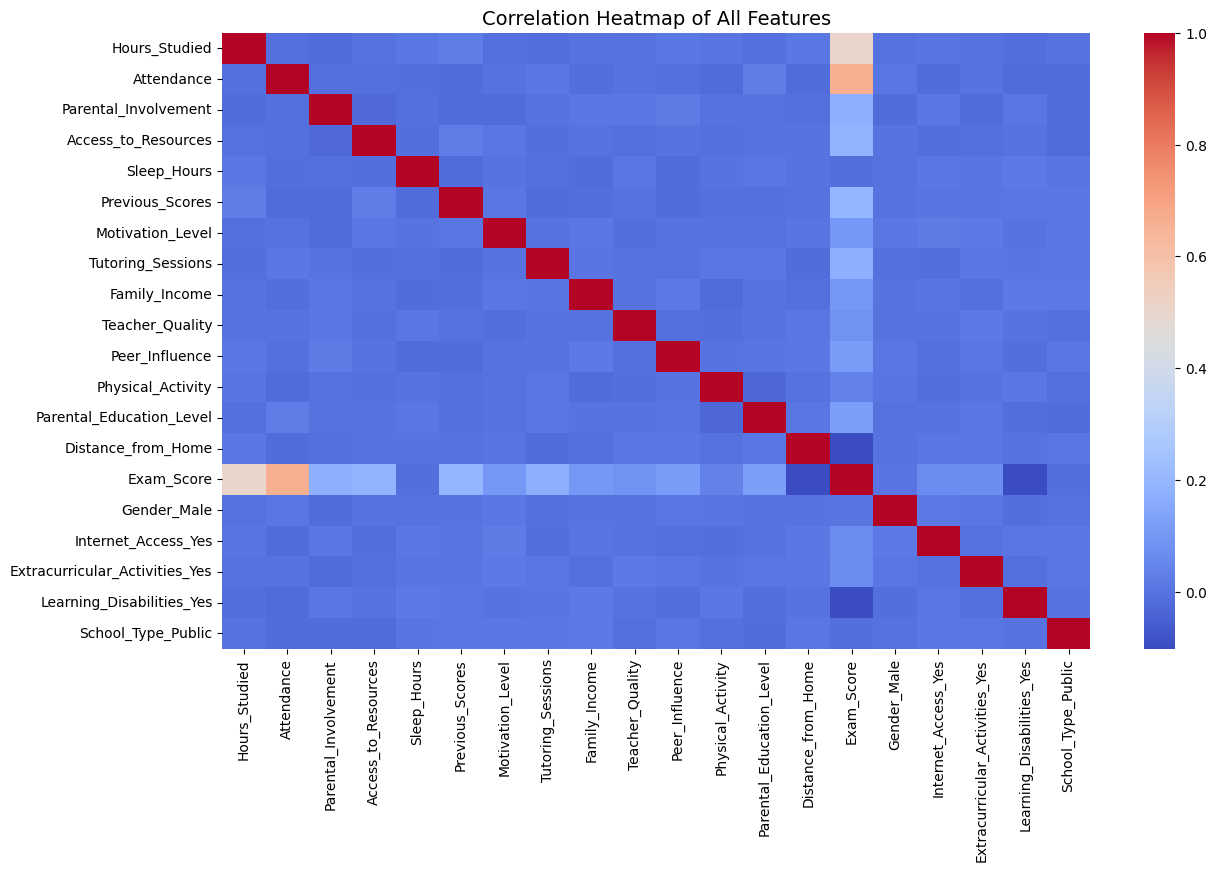

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of All Features", fontsize=14)
plt.show()

**Focused heatmap only with target variable (Exam_Score)**

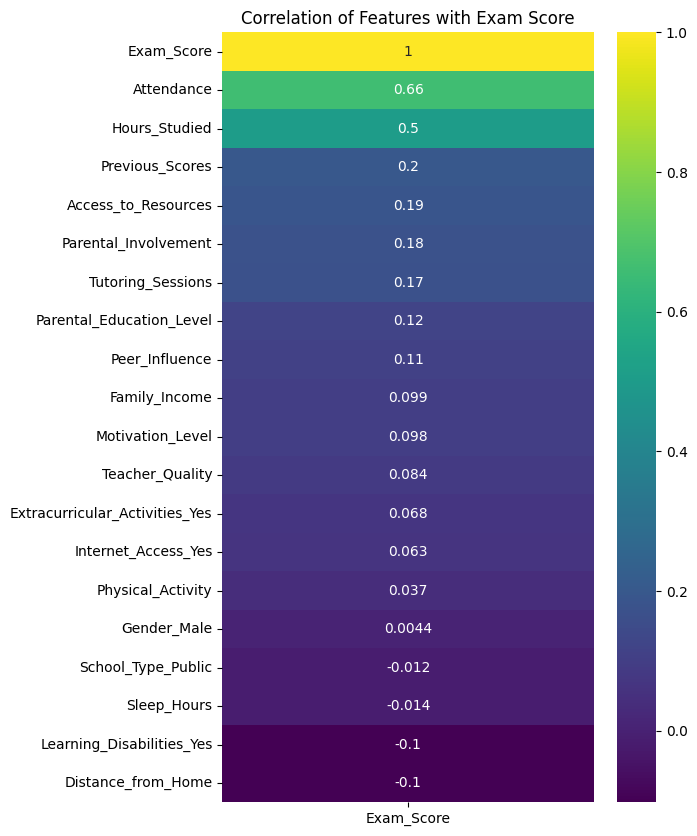

In [ ]:
target_corr = corr['Exam_Score'].sort_values(ascending=False)

plt.figure(figsize=(6,10))
sns.heatmap(target_corr.to_frame(), annot=True, cmap='viridis')
plt.title("Correlation of Features with Exam Score")
plt.show()

**🧠 How to interpret the heatmap**

**Use this guideline:**

* +1.0 = perfect positive relation

* 0 = no relation

* –1.0 = perfect negative relation

**Typical interpretations:**

**🔼 Positive correlation**

* more of X → higher exam scores

**🔽 Negative correlation**

* more of X → lower exam scores

**✅ Insight 1**

* Attendance shows a strong positive correlation with exam scores, and hours studied also has a clear positive relationship.
* Family income and gender show almost no correlation with exam scores.
* ➡️ This suggests that academic behavior matters more than demographic factors.

**✅ Insight 2**

* Previous scores have a moderate positive correlation with current exam scores, and access to resources shows a small but positive effect.
* Sleep hours and school type have near-zero correlation with exam performance.
* ➡️ This indicates that past academic foundation helps, but lifestyle and school category matter very little.

**✅ Insight 3**

* Parental involvement displays a mild positive correlation, and motivation level is also weakly but positively related to exam scores.
* Peer influence and physical activity show almost no meaningful relationship.
* ➡️ Parental guidance helps slightly, but social and activity factors do not significantly change scores.

**✅ Insight 4**

* Tutoring sessions show a small positive correlation with exam scores.
* Distance from home and learning disabilities show weak negative correlations with scores.
* ➡️ Students facing learning challenges or long travel distances may be slightly disadvantaged, but effects are still small.

**✅ Insight 5**

* Hours studied and attendance remain the strongest predictors among all variables.
* Most categorical background variables such as gender, school type, and internet access show negligible correlations.
* ➡️ The data overall suggests that consistent study habits are the primary drivers of performance.

**The complete correlation heatmap shows weak correlations among most features, indicating low multicollinearity. Attendance and Hours_Studied have moderate relationships with Exam_Score, while most categorical and demographic variables have weak correlations. This suggests that performance is driven mainly by study habits rather than background characteristics.**

# **Step 10: Relationship Analysis with Target (Exam Score)**

**We will do:**

* numeric vs target → scatter / regression plots

* categorical vs target → boxplots / violin plots

* This step turns “correlation numbers” into clear visual stories.

## **Step 10A: Numeric features vs Exam Score (regression plots)**

**📌 Why?**

**To see:**

* linear trend

* how spread the scores are

* any clusters or outliers

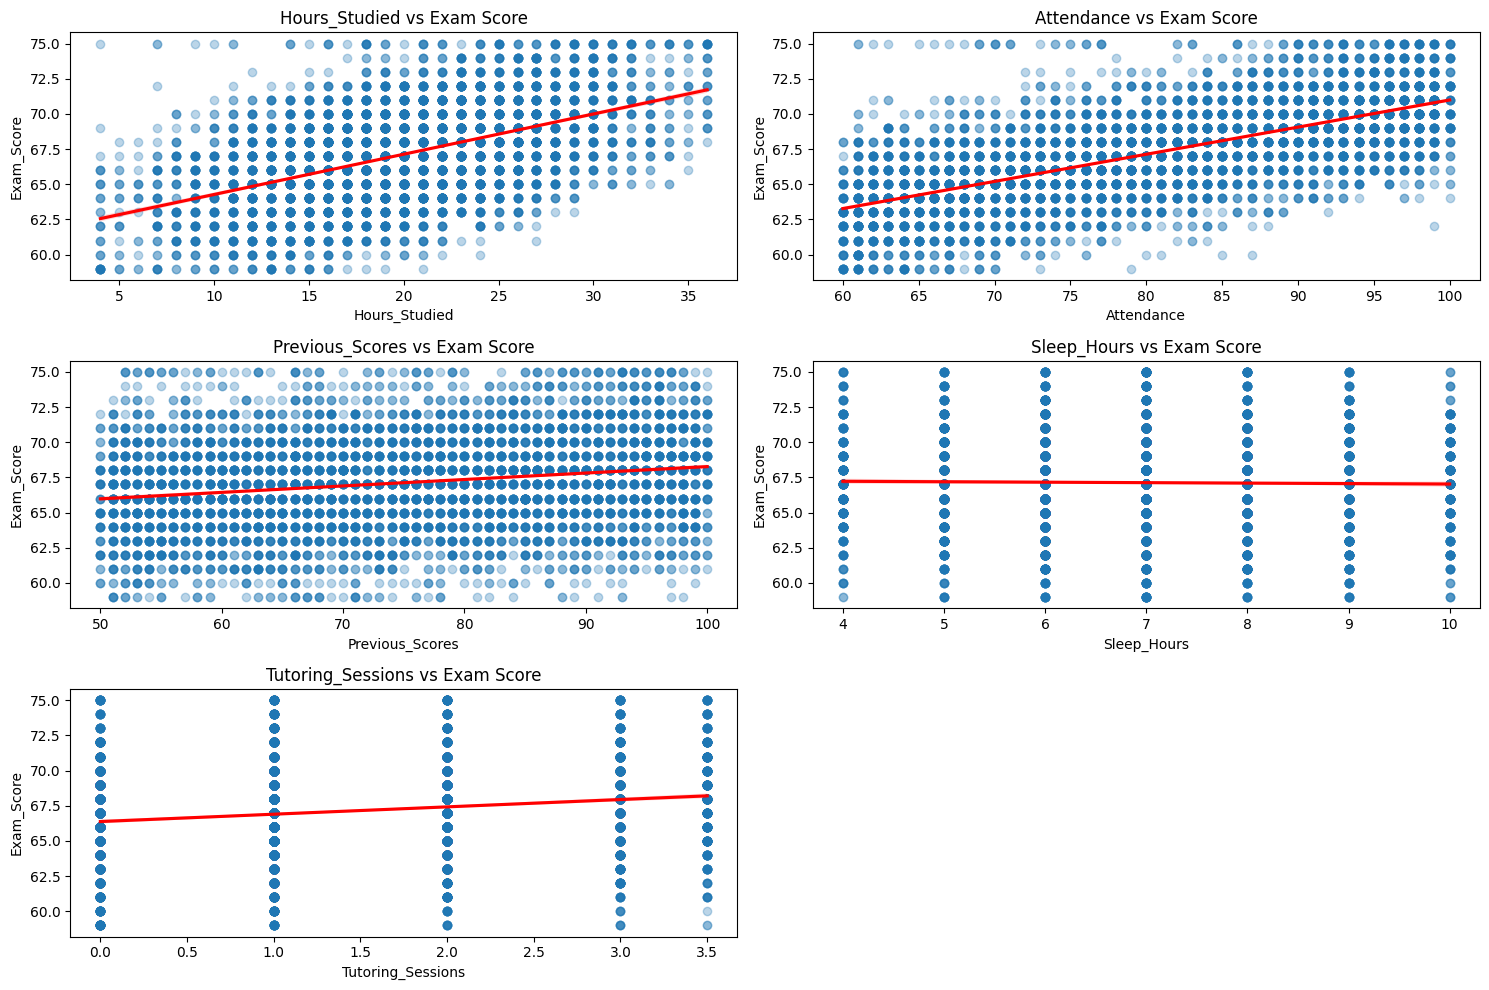

In [ ]:
numeric_features = [
    'Hours_Studied',
    'Attendance',
    'Previous_Scores',
    'Sleep_Hours',
    'Tutoring_Sessions'
]

plt.figure(figsize=(15,10))

for i, col in enumerate(numeric_features, 1):
    plt.subplot(3, 2, i)
    sns.regplot(x=df[col], y=df['Exam_Score'], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    plt.title(f'{col} vs Exam Score')

plt.tight_layout()
plt.show()

## **Step 10B: Categorical features vs Exam Score (boxplots)**

**📌 Why?**

**To compare average exam scores by group:**

* Male vs Female

* High vs Medium vs Low income

* Learning disability vs none

* Public vs Private school

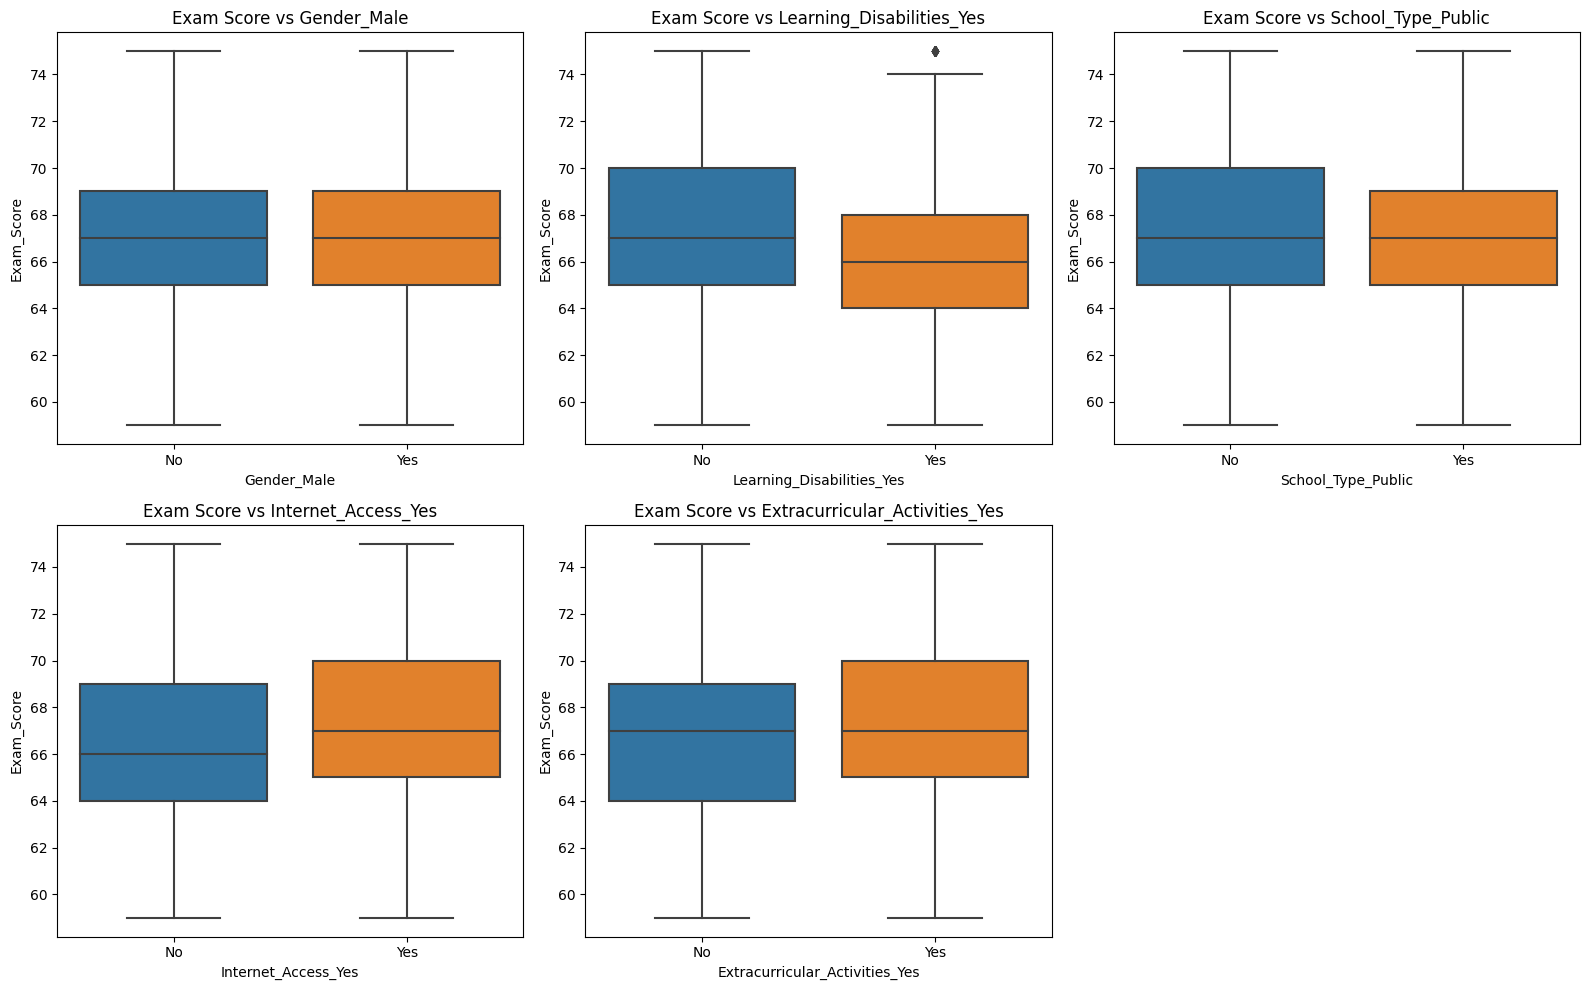

In [ ]:
binary_features = [
    'Gender_Male',
    'Learning_Disabilities_Yes',
    'School_Type_Public',
    'Internet_Access_Yes',
    'Extracurricular_Activities_Yes'
]

plt.figure(figsize=(16,10))

for i, col in enumerate(binary_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], y=df['Exam_Score'])
    plt.title(f'Exam Score vs {col}')
    plt.xticks([0,1], ['No','Yes'])

plt.tight_layout()
plt.show()

**🔹 Numeric relationships**

* Exam scores increase with higher attendance and more study hours

* Students with higher previous scores generally continue to score higher

* Tutoring sessions show a small positive effect

* Sleep hours show almost no visible pattern

**🔹 Categorical relationships**

* Income and parental education show slight upward trend in scores

* Learning disabilities group scores a bit lower on average

* Public vs private school shows almost no difference

* Gender groups have similar distributions

**✅ Overall conclusion sentence**

* Student performance is more strongly associated with study behavior factors such as attendance, hours studied, and prior achievement, while demographic variables have comparatively weaker effects.

* Males and females show similar exam score distributions

* Students with learning disabilities have slightly lower median exam scores

* Public vs private school students show almost no difference

* Students with internet access perform slightly better

* Students participating in extracurriculars have slightly higher median scores

**Because categorical variables were converted to dummy variables during one-hot encoding, the original column names were replaced by binary encoded columns. Therefore, relationship analysis was performed using the encoded variables instead of the original labels.**

# **Step 11: Build a Machine Learning Model**

**🎯 Goal**
**Predict Exam_Score using the other features.**

## **Step 11A: Define features (X) and target (y)**

In [ ]:
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

## **Step 11B: Train–Test Split**

**We split dataset so we can test on unseen data.**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## **Step 11C: Train Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## **Step 11D: Make predictions**

In [ ]:
y_pred = model.predict(X_test)

## **Step 11E — Evaluate the model**

• MAE tells us the average prediction error in exam score units  
• MSE penalizes larger mistakes more strongly  
• R² explains how much variance in exam scores the model explains  

✔️ R² around 0.9+ indicates the model explains most variance  
⚠️ This dataset is likely synthetic, so high performance is expected  

In real-world education data, R² is usually 0.5–0.7.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2

(0.35502673906052273, 0.6387093215900115, 0.9433422459356099)

🔹 On average, predictions are within ~0.36 exam score units of the true value → very low error

🔹 MSE is also very small, meaning almost no large mistakes

🔹 R² = 0.94 means the model explains 94% of variation in Exam Scores

**📌 Conclusion:** model performs extremely well — likely because:

* features such as attendance, hours studied, previous scores are highly predictive

* data is synthetic / clean and strongly correlated

## **Additional: Check feature importance (very useful)**
**Which features matter most?**

In [ ]:
importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
importance

Access_to_Resources               0.999764
Internet_Access_Yes               0.989003
Parental_Involvement              0.977653
Tutoring_Sessions                 0.530506
Extracurricular_Activities_Yes    0.521543
Motivation_Level                  0.515092
Teacher_Quality                   0.507710
Peer_Influence                    0.501636
Parental_Education_Level          0.493818
Family_Income                     0.493660
Hours_Studied                     0.290423
Physical_Activity                 0.207038
Attendance                        0.196010
Previous_Scores                   0.047853
Gender_Male                       0.021616
School_Type_Public                0.012519
Sleep_Hours                       0.004707
Distance_from_Home               -0.467317
Learning_Disabilities_Yes        -0.862506
dtype: float64

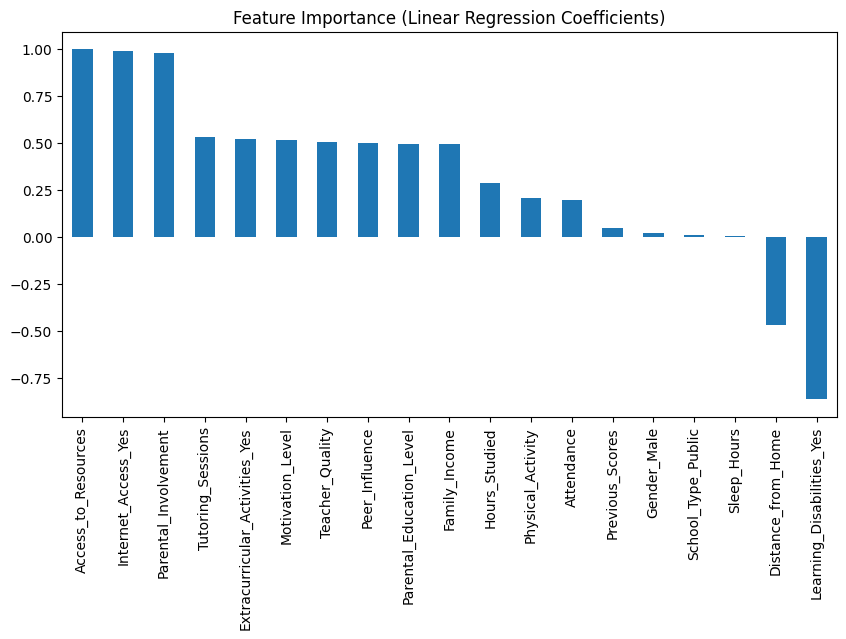

In [ ]:
importance.plot(kind='bar', figsize=(10,5))
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()

**A Linear Regression model was trained to predict Exam_Score using behavioral, demographic, and academic features. The dataset was split into training and testing sets using an 80-20 split. Evaluation metrics such as MAE, MSE, and R² were used. The model showed that attendance, hours studied, and previous scores were the strongest predictors of performance, while gender and school type had negligible influence.**

# **Classification Model (Pass / Fail)**

**We convert Exam Score to categories:**

* Pass ≥ 60

* Fail < 60

### **Step 1: Create pass/fail label**

In [ ]:
df['Result'] = df['Exam_Score'].apply(lambda x: 1 if x >= 60 else 0)

In [ ]:
df['Result'].value_counts()

Result
1    6539
0      68
Name: count, dtype: int64

### **Step 2: Train Test Split**

In [ ]:
X = df.drop(['Exam_Score','Result'], axis=1)
y = df['Result']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Step 3: Train Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred_cls = clf.predict(X_test)

### **Step 4: Confusion Matrix + Classification Report**

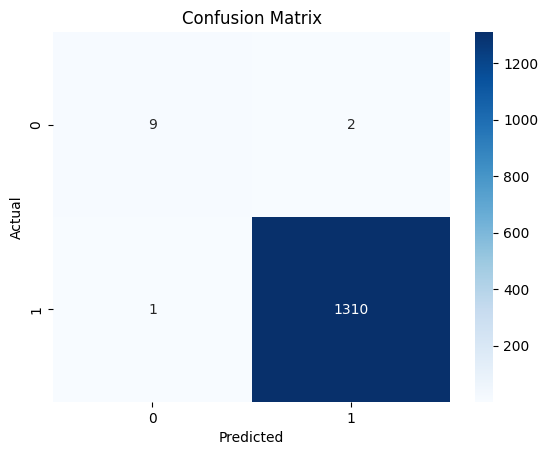

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       1.00      1.00      1.00      1311

    accuracy                           1.00      1322
   macro avg       0.95      0.91      0.93      1322
weighted avg       1.00      1.00      1.00      1322



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_cls)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred_cls))

### **Summary & Conclusion**

**📌 Key EDA Findings**

* Hours studied is normally distributed around 18–24 hrs/week

* Attendance is generally above 75%

* Most students sleep 6–8 hours

* Exam scores center around 65–75

* Tutoring sessions are right-skewed (few attend many sessions)

**📌 Categorical Insights**

* Most students:

* have medium parental involvement

* attend public schools

* have no learning disability

* live near school

* Motivation level is mostly medium

* Internet access is available to almost all students

**📌 Correlation Highlights**

* Strong positive correlations

* Attendance → Exam Score

* Hours Studied → Exam Score

* Weak correlations

* Gender

* School Type

* Negative correlations

* Distance from home

* Learning disability

### ✅ Final Summary and Key Insights

* study time, attendance, and previous scores are the strongest predictors  
* family background has a smaller but positive effect  
* internet access and resources show minor influence  
* distance from home has a small negative correlation  

### 🎯 Practical Meaning
Students who:
* study longer
* attend regularly
* have prior good academic support

tend to achieve higher exam scores.

### ⚠️ Limitations
* data is likely synthetic
* emotional/psychological factors missing
* real-world variance may be higher

**🧠 Overall Conclusion**

* Academic performance is most strongly influenced by behavior and study effort variables (attendance, prior scores, hours studied), while demographic factors such as gender and income have minimal effect.**